In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
splits = {'train': 'socratic/train-00000-of-00001.parquet', 'test': 'socratic/test-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/openai/gsm8k/" + splits["train"])    
df.head()

/Users/chetan/Desktop/Education/Rutgers/2nd Sem/CS541 Adv Data Mgmt/Project/omni-model-chat/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,question,answer
0,Natalia sold clips to 48 of her friends in Apr...,How many clips did Natalia sell in May? ** Nat...
1,Weng earns $12 an hour for babysitting. Yester...,How much does Weng earn per minute? ** Weng ea...
2,Betty is saving money for a new wallet which c...,How much money does Betty have in the beginnin...
3,"Julie is reading a 120-page book. Yesterday, s...",How many pages did Maila read today? ** Maila ...
4,James writes a 3-page letter to 2 different fr...,How many pages does he write each week? ** He ...


In [4]:
df['no_of_words'] = df['question'].apply(lambda x: len(x.split()))
df.head()

,question,answer,no_of_words
0,Natalia sold clips to 48 of her friends in Apr...,How many clips did Natalia sell in May? ** Nat...,31
1,Weng earns $12 an hour for babysitting. Yester...,How much does Weng earn per minute? ** Weng ea...,20
2,Betty is saving money for a new wallet which c...,How much money does Betty have in the beginnin...,50
3,"Julie is reading a 120-page book. Yesterday, s...",How many pages did Maila read today? ** Maila ...,41
4,James writes a 3-page letter to 2 different fr...,How many pages does he write each week? ** He ...,20


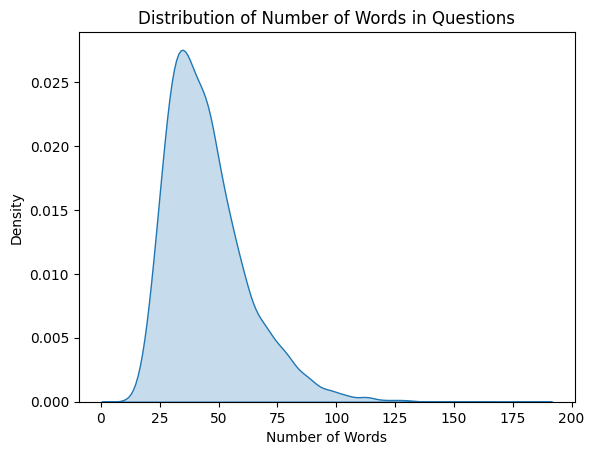

In [26]:
sns.kdeplot(df['no_of_words'], fill=True)
plt.title('Distribution of Number of Words in Questions')
plt.xlabel('Number of Words')
plt.ylabel('Density')
plt.savefig('word_distribution_gsm8k.png')
plt.show()

In [9]:
df.shape

(7473, 3)

In [17]:
df['no_of_words'].describe()

count    7473.000000
mean       45.092600
std        17.482279
min         9.000000
25%        33.000000
50%        42.000000
75%        54.000000
max       183.000000
Name: no_of_words, dtype: float64

In [19]:
q1, q2, q3 = df['no_of_words'].quantile([0.25, 0.5, 0.75])
minimum, maximum = df['no_of_words'].min(), df['no_of_words'].max()
q1, q2, q3, minimum, maximum

(33.0, 42.0, 54.0, np.int64(9), np.int64(183))

In [20]:
def categorize_word_count(word_count):
    if word_count <= q1:
        return 'short'
    elif word_count <= q3:
        return 'medium'
    else:
        return 'long'

df['word_count_category'] = df['no_of_words'].apply(categorize_word_count)
df.head()

,question,answer,no_of_words,word_count_category
0,Natalia sold clips to 48 of her friends in Apr...,How many clips did Natalia sell in May? ** Nat...,31,short
1,Weng earns $12 an hour for babysitting. Yester...,How much does Weng earn per minute? ** Weng ea...,20,short
2,Betty is saving money for a new wallet which c...,How much money does Betty have in the beginnin...,50,medium
3,"Julie is reading a 120-page book. Yesterday, s...",How many pages did Maila read today? ** Maila ...,41,medium
4,James writes a 3-page letter to 2 different fr...,How many pages does he write each week? ** He ...,20,short


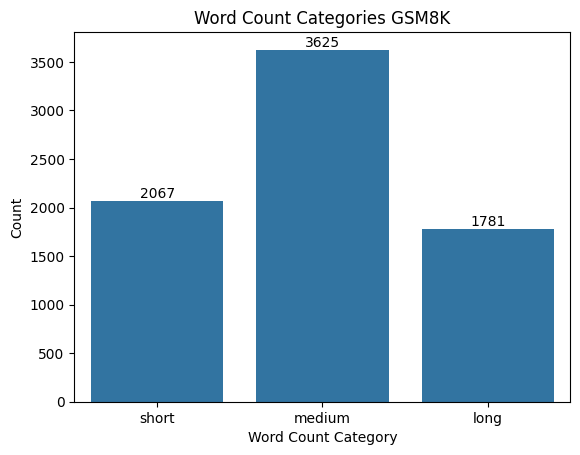

In [25]:
sns.countplot(x='word_count_category', data=df)
plt.title('Word Count Categories GSM8K')
plt.xlabel('Word Count Category')
plt.ylabel('Count')
plt.bar_label(plt.gca().containers[0])
plt.savefig('word_count_categories_gsm8k.png')
plt.show()